# Multivariate Linear Regression

## Welcome!

Today we're going to talk some more about last-time's topic - **Linear Regression** in a more generalized way. 

You'll see that with just a few changes, we will be able to apply Linear Regression model to problems much more interesting than plotting straight lines!

In [2]:
# imports
import sys
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, fixed
import solutions
import importlib.util
import pandas as pd
import sklearn as sk
from typing import Tuple, Optional, List


%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Previously

### $$y = w_0 + w_1 \cdot x$$



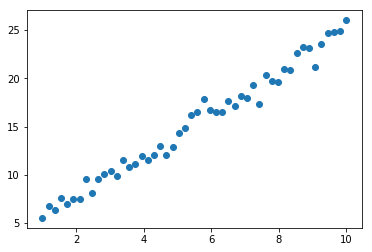

In [3]:
X = solutions.X_1
Y = solutions.Y_1

plt.scatter(X, Y)

* we want to find the optimal $(w_0, w_1)$ - our **model**

* our model will be able to make a **hypothesis**

### $$ h_W(x) = w_0 + w_1 \cdot x$$

* a **loss function** lets as calculate how well our model **fits** the data. In this case, the loss function could look like this:

### $$L_{prev} = \frac{1}{N}\sum_{i=0}^N(h_W(x^{(i)}) - y^{(i)})^2 $$
 
 Though it's good enough for our purposes, we'll divide loss function by 2 - it won't change anything about it illustrating the quality of the model, but will simplify latter computations (can you guess how?)
 
### $$L = \frac{1}{2N}\sum_{i=0}^N(h_W(x^{(i)}) - y^{(i)})^2 $$

* We can find $(w_0, w_1)$ by using **Gradient Descent** method. 

* If we calculate gradients of $L$ with respect to $(w_0, w_1)$, or $\dfrac{\partial L}{\partial w_0}$ and $\dfrac{\partial L}{\partial w_1}$, we will know how to shift the values of $(w_0, w_1)$, so that they will fit the data better.

### $$
\dfrac{\partial L}{\partial w_0} = \dfrac{\sum_{i=0}^n w_0 + w_1 x^{(i)} - y^{(i)}}{n} \\
\dfrac{\partial L}{\partial w_1} =  \dfrac{\sum_{i=0}^n (w_0 + w_1 x^{(i)} - y^{(i)}) \cdot x^{(i)}}{n}
$$

![The idea of Gradient Descent](../1_regression/img/gradient_descent_0.png)

* We multiply the gradients by a **learning rate** $\alpha$, so that the updates are small and don't overshoot their objective.

### $$
w_0 = w_0 - \dfrac{\partial L}{\partial w_0} \cdot \alpha \\
w_1 = w_1 - \dfrac{\partial L}{\partial w_1} \cdot \alpha
$$
* We repeat that process for an arbitrary number of **epochs**

![Learning rates](../1_regression/img/learning_rate.png)

In [4]:
spec = importlib.util.spec_from_file_location(
    "solutions", 
    "../1_regression/solutions.py"
)
solutions_1 = importlib.util.module_from_spec(spec)
spec.loader.exec_module(solutions_1)

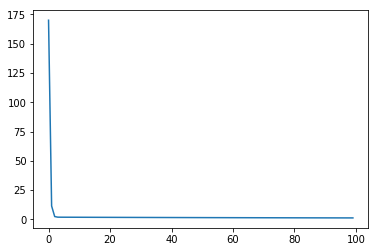

In [9]:
init_w_0 = np.random.rand()
init_w_1 = np.random.rand()
learning_rate = 0.01
num_iterations = 100

trained_w_0, trained_w_1, loss_history = \
    solutions_1.train_model(init_w_0, init_w_1, X, Y, learning_rate, num_iterations)

plt.plot(list(range(num_iterations)), loss_history)
plt.show()

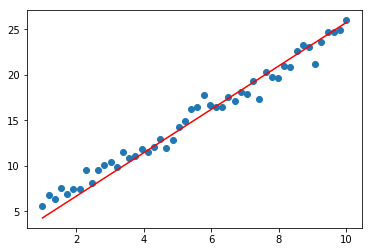

w_0: 1.8920591669070734
w_1: 2.3859424813275676
Loss: 1.0801745708387023


In [6]:
Y_pred = trained_w_0 + trained_w_1 * X 
plt.scatter(X, Y)
plt.plot(X, Y_pred, 'r')
plt.show()
print('w_0:', trained_w_0)
print('w_1:', trained_w_1)
print('Loss:', solutions_1.my_loss_vectorized(trained_w_0, trained_w_1, X, Y))

## Now let's go bigger!

Today, we'll apply linear regression to real-life data!

In [10]:
from sklearn.datasets import load_boston
dataset = load_boston()
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df['target'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We're dealing with a dataset describing houses - each of them has **13** features. Let's see how each of them is related to our target - the price of the house!

-------CRIM--------


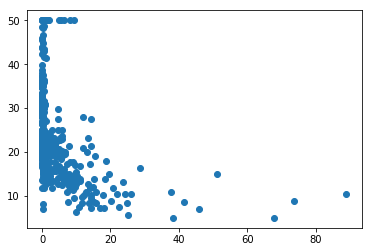

-------ZN--------


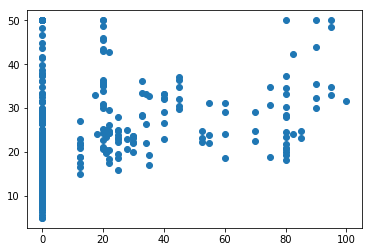

-------INDUS--------


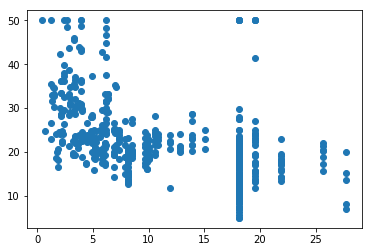

-------CHAS--------


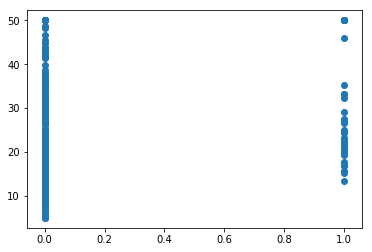

-------NOX--------


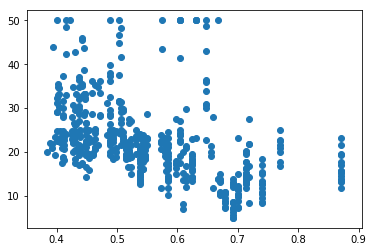

-------RM--------


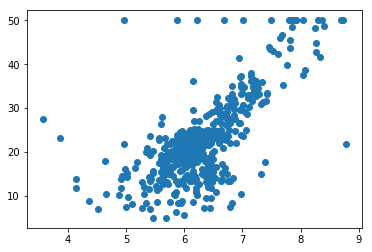

-------AGE--------


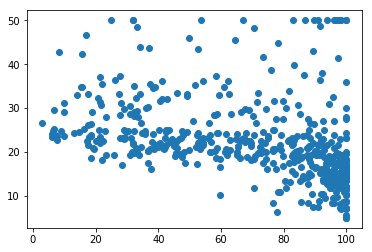

-------DIS--------


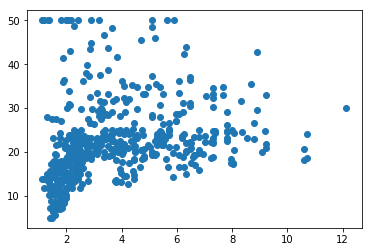

-------RAD--------


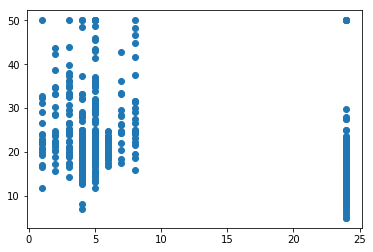

-------TAX--------


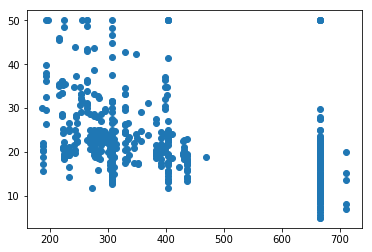

-------PTRATIO--------


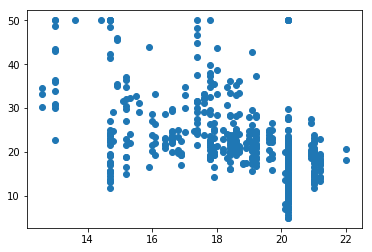

-------B--------


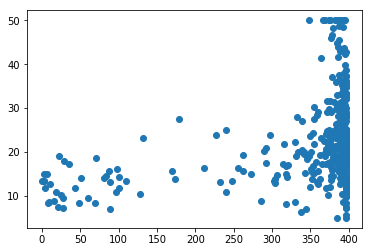

-------LSTAT--------


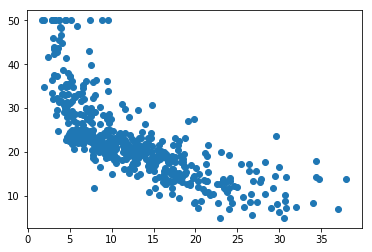

In [13]:
for feature in df.columns:
    if feature != 'target':
        print(f"-------{feature}--------")
        plt.scatter(df[feature], df['target'])
        plt.show()

As you can see from the plots, in most of them some kind of relationship can be observed.

Now, is it possible to use what we already know to train a model which will make accurate enough predictions?

In [14]:
X = dataset.data
Y = dataset.target

X.shape, Y.shape

((506, 13), (506,))

The main difference is that previously:

### $$\hat{y} = h_W(x) = w_0 + w_1x$$ 

And today:

### $$\hat{y} = h_W(x_1, x_2, ..., x_k) \\
= w_0 + w_1x_1+ w_2x_2+ w_3x_3+ ... + w_kx_k \\
= w_0 + \sum_{i=1}^k w_i x_i$$ 

As you can see, $w_0$ has been left out from the sum, which makes it sad. Can we do something, which will make it possible to include it there?

The simple solution is to add a *bias feature* to our input dataset - $X$ - i.e. add a column of ones to it.

This way, for each datapoint $x^{(j)}$,  
### $$x_0^{(j)} = 1$$
and 
### $$ x_0^{(j)} \cdot w_0 = w_0 $$

therefore

### $$ w_0 + \sum_{i=1}^k w_i x_i^{(j)} =  \sum_{i=0}^k w_i x_i^{(j)} = h_W(x^{(j)})$$

In [15]:
X = np.column_stack([np.ones(X.shape[0]), X])
X.shape, Y.shape

((506, 14), (506,))

Calculating this manually every time is not a goood idea. 

Your task now is to implement a function which will compute the hypotheses for given data $(X)$ and model $(w_0, w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9, w_{10}, w_{11}, w_{12}, w_{13})$

In [16]:
def hypothesis(
    X: np.ndarray,
    w_0: float, 
    w_1: float, 
    w_2: float, 
    w_3: float, 
    w_4: float, 
    w_5: float, 
    w_6: float, 
    w_7: float, 
    w_8: float, 
    w_9: float, 
    w_10: float, 
    w_11: float, 
    w_12: float, 
    w_13: float
) -> np.ndarray:
    pass
    # PLEASE DON'T EVER DO THAT

Wow, I got tired of even writing this header!

We obviously need something more elegant. This is why, from now on, we'll always think of particular datapoints not as numbers, but vectors of numbers. Therefore, the whole dataset will be a **vector of vectors** - a matrix.

The same way, we won't care much for every particular weight in our model, we'll treat them as a single vector of numbers.

So: 
### $$
\hat{y}^{(j)} = h_W(x^{(j)}) \sum_{i=0}^k w_i x_i^{(j)} = \sum Wx^{(j)} 
$$

* $W$ has shape $[n_{features}]$
* $X$ has shape $[n_{datapoints}, n_{features}]$
* $Y$ has shape $[n_{datapoints}]$

Please implement it. If you use numpy magic instead of iterating over columns, it should take you just one line of code!

In [41]:
def hypotheses(W: np.ndarray, X: np.ndarray) -> np.ndarray:
    return X @ W
    #return np.zeros(X.size[0])

In [42]:
#hypotheses = solutions.hypotheses

In [43]:
# let's make a sanity check on a few examples!
W = np.random.rand(X.shape[1])
print('your solution:', hypotheses(W, X[:5]))
print('provided solution:', solutions.hypotheses(W, X[:5]))


your solution: [106.85319557 104.81578285 100.08725765  95.02855159  97.6032544 ]
provided solution: [106.85319557 104.81578285 100.08725765  95.02855159  97.6032544 ]


This also means we have to update the formula for the cost function:

### $$
L(w_0, w_1, ... w_n) = L(W) \\ 
= \frac{1}{2N}\sum_{i=0}^N(\sum_{j=0}^k w_j x^{(i)}_j - y^{(i)})^2 \\
= \frac{1}{2N}\sum_{i=0}^N (h_W(x^{(i)}) - y^{(i)})^2
$$

In [50]:
def loss(W: np.ndarray, X: np.ndarray, Y: np.ndarray) -> float:
    H = hypotheses(W, X)
    err = H - Y
    err_sq = err ** 2
    return np.mean(err_sq) / 2

In [51]:
#loss = solutions.loss

In [52]:
W = np.random.rand(X.shape[1])
print('your solution:', loss(W, X, Y))
print('provided solution:', solutions.loss(W, X, Y))

your solution: 142945.81295356812
provided solution: 142945.81295356812


...and Gradient Steps

For every iteration:
* calculate partial derivatives of cost function with respect to every element of W:

### $$\epsilon_j = \frac{\partial}{\partial w_j}L(W) = \frac{1}{N} \sum_{i=1}^N(h_W(x^{(i)}) - y^{(i)})x_j^{(i)}$$

* **simultaneously** update every element of W:

### $$w_j = w_j - \alpha \epsilon_j$$ 

Where $\alpha$ is our learning rate.

In [83]:
def gradient_step(
    W: np.ndarray, 
    X: np.ndarray, 
    Y: np.ndarray, 
    learning_rate=0.01
) -> np.ndarray:
    Y_pred = hypotheses(W, X)
    err = Y_pred - Y
    eps = err @ X / len(err)
    return W - eps * learning_rate

In [84]:
#gradient_step = solutions.gradient_step

In [85]:
W = np.random.rand(X.shape[1])
print('your solution:', gradient_step(W, X, Y))
print('provided solution:', solutions.gradient_step(W, X, Y))

your solution: [-5.14046924e+00 -2.44174929e+01 -5.15452216e+01 -6.53991916e+01
 -2.12744924e-01 -2.38304695e+00 -3.29334526e+01 -3.91273902e+02
 -1.92235797e+01 -5.92132747e+01 -2.39590455e+03 -1.00524120e+02
 -1.93318210e+03 -7.31571788e+01]
provided solution: [-5.14046924e+00 -2.44174929e+01 -5.15452216e+01 -6.53991916e+01
 -2.12744924e-01 -2.38304695e+00 -3.29334526e+01 -3.91273902e+02
 -1.92235797e+01 -5.92132747e+01 -2.39590455e+03 -1.00524120e+02
 -1.93318210e+03 -7.31571788e+01]


### With all those tools at our disposal, let's train a model!


In [86]:
def train_model(
    init_W: np.ndarray,
    X: np.ndarray,
    Y: np.ndarray,
    learning_rate: float,
    num_iterations: int
) -> Tuple[np.ndarray, List[float]]:
    return init_W, []

In [87]:
train_model = solutions.train_model

In [88]:
init_W = np.random.rand(X.shape[1])
print('your solution:', train_model(init_W, X, Y, 0.1, 1))
print('provided solution:', solutions.train_model(init_W, X, Y, 0.1, 1))

your solution: (array([-6.63104623e+01, -3.24167319e+02, -6.19406305e+02, -8.30991110e+02,
       -4.19503710e+00, -3.81529221e+01, -4.15515495e+02, -4.86009041e+03,
       -2.32802355e+02, -7.70805813e+02, -3.01474366e+04, -1.25187290e+03,
       -2.35308676e+04, -9.15354755e+02]), [239091.57659153917])
provided solution: (array([-6.63104623e+01, -3.24167319e+02, -6.19406305e+02, -8.30991110e+02,
       -4.19503710e+00, -3.81529221e+01, -4.15515495e+02, -4.86009041e+03,
       -2.32802355e+02, -7.70805813e+02, -3.01474366e+04, -1.25187290e+03,
       -2.35308676e+04, -9.15354755e+02]), [239091.57659153917])


/mnt/d/Dokumenty/Studia/BIT_AI/2_multivariate_regression/solutions.py:11: RuntimeWarning: overflow encountered in square
  errors_squared = errors ** 2
/mnt/d/Dokumenty/Studia/BIT_AI/2_multivariate_regression/solutions.py:19: RuntimeWarning: invalid value encountered in subtract
  return W - epsilons * learning_rate


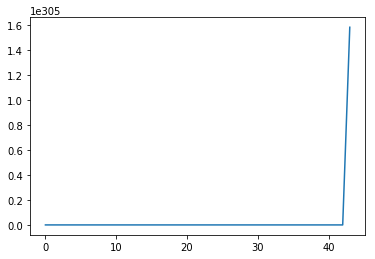

example targets [24.  21.6 34.7 33.4 36.2]
example predictions [nan nan nan nan nan]


In [103]:
init_W = np.random.rand(X.shape[1])
num_iterations = 10000
learning_rate = 0.01

trained_W, loss_hist = train_model(init_W, X, Y, learning_rate, num_iterations)

plt.plot(np.arange(num_iterations), loss_hist)
plt.show()

Y_pred = hypotheses(trained_W, X)

print('example targets', Y[:5])
print('example predictions', Y_pred[:5])

### WTF just happened?

Our algorithms seem to be perfect, yet loss has exploded and our trained weights are NaNs! Why is that?

In [99]:
def pretty_format(to_print, name=None):
    if name is not None: print(name)
    print(["%.2f" % x for x in to_print])

pretty_format(X.mean(axis=0), "means")
pretty_format(X.max(axis=0) - X.min(axis=0), "ranges")


means
['1.00', '3.59', '11.36', '11.14', '0.07', '0.55', '6.28', '68.57', '3.80', '9.55', '408.24', '18.46', '356.67', '12.65']
ranges
['0.00', '88.97', '100.00', '27.28', '1.00', '0.49', '5.22', '97.10', '11.00', '23.00', '524.00', '9.40', '396.58', '36.24']


Our datapoints have very weird orders of magnitude, ranging form $10^0$ to $10^2$. 

Even though the initial weights are very small, you can guess what such initial values will do to the initial hypotheses, values of loss function and it's gradients. 

Moreover, due to the imbalance in the scales of features, the process of training itself will be slower, as updates in some weights will outweight updates in the others. 

![Normalization](img/normalization.png)



## Feature scaling to the rescue!

We want all our features to be roughly in the same range, i.e [-1, 1]. This is called **data normalization**. 

One way to achieve it is **mean normalization**:

$$x_i = \frac{x_i - \mu_i}{max(x_i) - min(x_i)}$$

The exception is the bias feature - $x_0$  - since it's always equal to 1 (just like we want i t to be), we don't normalize it!

Now, implement a function which will calculate the mean-normalized Xs (and keep $X_0$ intact).
The function should return normalized X and calculated means and ranges.
We also want to be able to provide the function with pre-calculated means and ranges and use those, instead of calculating them from provided X.

In [100]:
def mean_normalization(
    X: np.ndarray, 
    means: Optional[np.ndarray] = None, 
    ranges: Optional[np.ndarray] = None
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    return X, means, ranges

In [101]:
mean_normalization = solutions.mean_normalization

In [102]:
X_norm, X_mean, X_range = mean_normalization(X)
X_norm_sol, X_mean_sol, X_range_sol = solutions.mean_normalization(X)

pretty_format(X_mean, "means yours")
pretty_format(X_mean_sol, "means provided")
print()
pretty_format(X_range, "ranges yours")
pretty_format(X_range_sol, "ranges provided")


means yours
['0.00', '3.59', '11.36', '11.14', '0.07', '0.55', '6.28', '68.57', '3.80', '9.55', '408.24', '18.46', '356.67', '12.65']
means provided
['0.00', '3.59', '11.36', '11.14', '0.07', '0.55', '6.28', '68.57', '3.80', '9.55', '408.24', '18.46', '356.67', '12.65']

ranges yours
['1.00', '88.97', '100.00', '27.28', '1.00', '0.49', '5.22', '97.10', '11.00', '23.00', '524.00', '9.40', '396.58', '36.24']
ranges provided
['1.00', '88.97', '100.00', '27.28', '1.00', '0.49', '5.22', '97.10', '11.00', '23.00', '524.00', '9.40', '396.58', '36.24']


In [105]:
X_norm

array([[ 1.        , -0.04032197,  0.06636364, ..., -0.33569506,
         0.10143217, -0.21172912],
       [ 1.        , -0.04008605, -0.11363636, ..., -0.06973762,
         0.10143217, -0.09693883],
       [ 1.        , -0.04008627, -0.11363636, ..., -0.06973762,
         0.09116942, -0.23794325],
       ...,
       [ 1.        , -0.03971008, -0.11363636, ...,  0.27068792,
         0.10143217, -0.1935172 ],
       [ 1.        , -0.03916124, -0.11363636, ...,  0.27068792,
         0.09273279, -0.17033839],
       [ 1.        , -0.03986013, -0.11363636, ...,  0.27068792,
         0.10143217, -0.13170704]])

In [98]:
# do feature matrices have the same shapes?
X.shape, X_norm.shape

((506, 14), (506, 14))

## Now that our data has been normalized, let's try to train a model once more

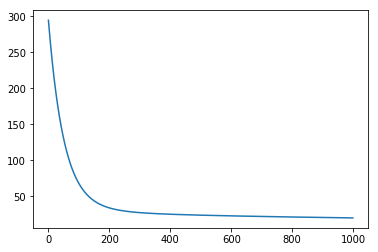

example targets [24.  21.6 34.7 33.4 36.2]
example predictions [28.34478637 25.21445741 27.33786398 27.68418462 27.28288294]
final loss 20.00823611325525


In [104]:
init_W = np.random.rand(X_norm.shape[1])
num_iterations = 1000
learning_rate = 0.01

trained_W, loss_hist = train_model(init_W, X_norm, Y, learning_rate, num_iterations)

plt.plot(np.arange(num_iterations), loss_hist)
plt.show()

Y_pred = hypotheses(trained_W, X_norm)

print('example targets', Y[:5])
print('example predictions', Y_pred[:5])
print('final loss', loss_hist[-1])

### How does it compare to a scikit-learn model?

In [107]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_norm, Y)
Y_pred_regr = regressor.predict(X_norm)
final_regressor_loss = np.mean((Y_pred_regr - Y) ** 2) / 2

pretty_format(Y[:5], 'example targets')
pretty_format(Y_pred[:5], 'example_predictions')
pretty_format([loss_hist[-1]], 'final loss')

example targets
['24.00', '21.60', '34.70', '33.40', '36.20']
example_predictions
['28.34', '25.21', '27.34', '27.68', '27.28']
final loss
['20.01']


Not bad!

As the final excercise, let's try to make things difficult for our model a bit more.

So far, things have been quite easy for our model - it was evaluated on the same data it hd been trained on. 

However, this is not the case in real life. What we care about is whether a trained model is able to make accurate predictions on the data it has never seen before.

That's why, when training **any** model on **any** dataset, the first thing you must do is split the dataset into **training**, **validation** and **test** sets.

For the simple models, validation set can be omitted, and today we'll see the usage of train and test sets.

In [113]:
def train_test_split(
    X: np.ndarray, 
    Y: np.ndarray,
    ratio: float = 0.7
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    n_datapoints = X.shape[0]
    assert(n_datapoints == Y.shape[0])
    shuffled_indices = np.arange(n_datapoints)
    np.random.shuffle(shuffled_indices)
    train_count = int(n_datapoints * ratio)
    train_indices = shuffled_indices[:train_count]
    test_indices = shuffled_indices[train_count:]

    X_train = X[train_indices]
    Y_train = Y[train_indices]
    X_test = X[test_indices]
    Y_test = Y[test_indices]
    
    return X_train, Y_train, X_test, Y_test


In [114]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y)

### Remember about data normalization!

#### How to normalize previously unseen data?

We have to make an assumption that the distribution of training data is close to the general distribution of data in our domain. In order for our normalization mapping to be coherent, we will normalize any test data using the means and ranges calculated from $X_{train}$


In [115]:
X_train, X_mean, X_range = mean_normalization(X_train)
# this is why we keep normalization data
X_test, X_mean, X_range = mean_normalization(X_test, X_mean, X_range)

In [116]:
def train_test_model(
    init_W: np.ndarray,
    X_train: np.ndarray,
    Y_train: np.ndarray,
    X_test: np.ndarray,
    Y_test: np.ndarray,
    learning_rate: float,
    num_iterations: int
) -> Tuple[np.ndarray, List[float], List[float]]:
    
    W = init_W
    train_loss_history = []
    test_loss_history = []
    for i in range(num_iterations):
        train_loss_history.append(loss(W, X_train, Y_train))
        test_loss_history.append(loss(W, X_test, Y_test))
        W = gradient_step(W, X_train, Y_train, learning_rate)
    return W, train_loss_history, test_loss_history

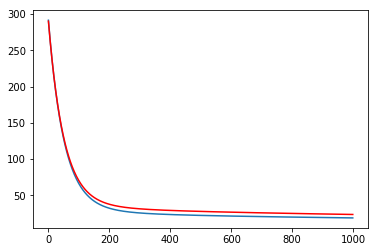

In [117]:
init_W = np.random.rand(X_norm.shape[1])
num_iterations = 1000
learning_rate = 0.01

trained_W, train_loss_hist, test_loss_hist = train_test_model(
    init_W, 
    X_train, 
    Y_train, 
    X_test, 
    Y_test, 
    learning_rate, 
    num_iterations
)

plt.plot(np.arange(num_iterations), train_loss_hist)
plt.plot(np.arange(num_iterations), test_loss_hist, color='red')

plt.show()

In [118]:
Y_pred = hypotheses(trained_W, X_test)
pretty_format(Y[:5], 'example targets')
pretty_format(Y_pred[:5], 'example_predictions')
pretty_format([train_loss_hist[-1], test_loss_hist[-1]], 'final loss')

example targets
['24.00', '21.60', '34.70', '33.40', '36.20']
example_predictions
['23.38', '18.10', '24.93', '14.33', '24.66']
final loss
['18.72', '23.48']


Our predictions are not quite perfect and loss leaves something to be desired. 
But we also see, that our model has learnt *some* intuition about making predictions from real-life data, including data it has never seen before. 

That's pretty good!